# Exploratory Data Analysis (EDA) - Parkinson's Disease Detection

This notebook performs comprehensive exploratory data analysis on the UCI Parkinson's Dataset to understand the characteristics of voice biomarkers for Parkinson's disease detection.

## Objectives:
1. Load and inspect the dataset structure
2. Analyze target distribution and class imbalance
3. Generate descriptive statistics
4. Categorize features by biomarker type
5. Perform statistical tests (Mann-Whitney U)
6. Conduct statistical power analysis
7. Calculate effect sizes (Cohen's d)
8. Create visualizations
9. Identify top discriminative features


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu, chi2_contingency
from statsmodels.stats.power import ttest_power
from statsmodels.stats.contingency_tables import mcnemar


# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("All libraries imported successfully!")


All libraries imported successfully!


## 2.1 Data Loading

Loading the Parkinson's dataset with correct headers from the data directory.


In [2]:
# Load the dataset
df = pd.read_csv('../data/parkinsons.data')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())


Dataset shape: (195, 24)

First 5 rows:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0 

## 2.2 Data Inspection

Inspecting the dataset structure, checking for missing values, duplicates, and data types.


In [3]:
# Dataset information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

print("\nDuplicate rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Dataset Info:
Shape: (195, 24)
Number of features: 24
Number of samples: 195

Data types:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Missing values:
No missing values found!

Duplicate rows:
Number of duplicate rows: 0


## 2.3 Metadata Analysis

Reading the dataset metadata from parkinsons.names file to understand feature descriptions.


In [4]:
# Read metadata from parkinsons.names file
print("Reading metadata from parkinsons.names file:")
print("=" * 50)

try:
    with open('../data/parkinsons.names', 'r') as f:
        metadata = f.read()
    
    # Display key information from metadata
    lines = metadata.split('\n')
    for line in lines[:25]:  # First 25 lines contain key info
        if line.strip():
            print(line)
            
except FileNotFoundError:
    print("parkinsons.names file not found!")

print("\n" + "=" * 50)
print("Key Dataset Information:")
print("- 195 voice recordings")
print("- 31 people (23 with Parkinson's disease)")
print("- 23 attributes including target variable 'status'")
print("- Target: 0 = healthy, 1 = Parkinson's disease")


Reading metadata from parkinsons.names file:
Title: Parkinsons Disease Data Set
Abstract: Oxford Parkinson's Disease Detection Dataset
-----------------------------------------------------	
Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A
-----------------------------------------------------	
Source:
The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.
-----------------------------------------------------

Key Dataset Information:
- 195 voice recordings
- 31 people (23 with Parkinson's disease)
- 23 attributes including target variable 'status'
- Target: 0 = healthy, 1 = Parkinson's disease


## 2.4 Target Distribution Analysis

Analyzing the distribution of the target variable (status) to understand class imbalance.


Target Variable Distribution:
Class 0 (Healthy): 48 samples
Class 1 (Parkinson's): 147 samples

Percentages:
Class 0 (Healthy): 24.6%
Class 1 (Parkinson's): 75.4%

Class Imbalance Ratio (Parkinson's:Healthy): 3.06:1


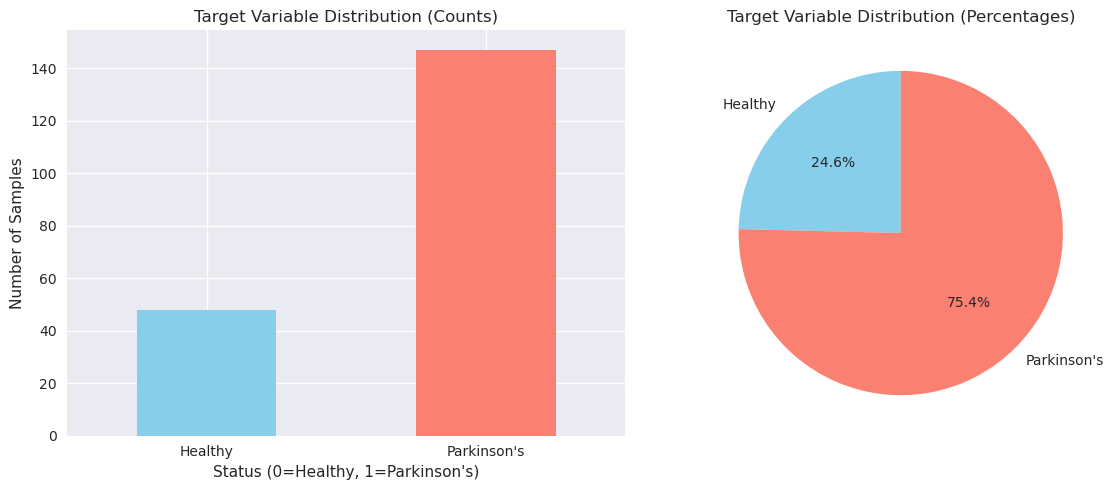

In [5]:
# Analyze target distribution
print("Target Variable Distribution:")
print("=" * 40)

# Count values
target_counts = df['status'].value_counts().sort_index()
print(f"Class 0 (Healthy): {target_counts[0]} samples")
print(f"Class 1 (Parkinson's): {target_counts[1]} samples")

# Calculate percentages
target_percentages = df['status'].value_counts(normalize=True).sort_index() * 100
print(f"\nPercentages:")
print(f"Class 0 (Healthy): {target_percentages[0]:.1f}%")
print(f"Class 1 (Parkinson's): {target_percentages[1]:.1f}%")

# Calculate class imbalance ratio
imbalance_ratio = target_counts[1] / target_counts[0]
print(f"\nClass Imbalance Ratio (Parkinson's:Healthy): {imbalance_ratio:.2f}:1")

# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
target_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Target Variable Distribution (Counts)')
ax1.set_xlabel('Status (0=Healthy, 1=Parkinson\'s)')
ax1.set_ylabel('Number of Samples')
ax1.set_xticklabels(['Healthy', 'Parkinson\'s'], rotation=0)

# Pie chart
labels = ['Healthy', 'Parkinson\'s']
colors = ['skyblue', 'salmon']
ax2.pie(target_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Target Variable Distribution (Percentages)')

plt.tight_layout()
plt.show()


## 2.5 Descriptive Statistics

Generating comprehensive descriptive statistics for all 22 numerical features.


In [6]:
# Get numerical features (exclude 'name' and 'status')
numerical_features = df.columns.drop(['name', 'status']).tolist()
print(f"Number of numerical features: {len(numerical_features)}")
print(f"Numerical features: {numerical_features}")

# Get numerical features (exclude 'name')
numerical_features_with_target = df.columns.drop(["name"]).tolist()

# Generate descriptive statistics
print("\nDescriptive Statistics for All Numerical Features:")
print("=" * 60)
desc_stats = df[numerical_features].describe()
print(desc_stats)

# Additional statistics
print("\nAdditional Statistics:")
print("=" * 30)
additional_stats = pd.DataFrame({
    'skewness': df[numerical_features].skew(),
    'kurtosis': df[numerical_features].kurtosis(),
    'variance': df[numerical_features].var(),
    'std': df[numerical_features].std()
})
print(additional_stats)

Number of numerical features: 22
Numerical features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

Descriptive Statistics for All Numerical Features:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitte

## 2.6 Feature Categorization

Categorizing features by biomarker type based on voice measurement characteristics.


In [7]:
# Define feature categories based on voice biomarker types
feature_categories = {
    'Fundamental Frequency': [
        'MDVP:Fo(Hz)',      # Average vocal fundamental frequency
        'MDVP:Fhi(Hz)',     # Maximum vocal fundamental frequency  
        'MDVP:Flo(Hz)'      # Minimum vocal fundamental frequency
    ],
    'Jitter': [
        'MDVP:Jitter(%)',   # Percentage jitter
        'MDVP:Jitter(Abs)', # Absolute jitter
        'MDVP:RAP',         # Relative average perturbation
        'MDVP:PPQ',         # Period perturbation quotient
        'Jitter:DDP'        # Average absolute difference of differences between jitter cycles
    ],
    'Shimmer': [
        'MDVP:Shimmer',     # Local shimmer
        'MDVP:Shimmer(dB)', # Local shimmer in dB
        'Shimmer:APQ3',     # 3-point amplitude perturbation quotient
        'Shimmer:APQ5',     # 5-point amplitude perturbation quotient
        'MDVP:APQ',         # 11-point amplitude perturbation quotient
        'Shimmer:DDA'       # Average absolute difference between amplitudes of consecutive periods
    ],
    'Noise Ratios': [
        'NHR',              # Noise-to-harmonics ratio
        'HNR'               # Harmonics-to-noise ratio
    ],
    'Nonlinear Dynamics': [
        'RPDE',             # Recurrence period density entropy
        'DFA',              # Detrended fluctuation analysis
        'D2'                # Correlation dimension
    ],
    'Frequency Variation': [
        'spread1',          # Nonlinear measure of fundamental frequency variation
        'spread2',          # Nonlinear measure of fundamental frequency variation
        'PPE'               # Pitch period entropy
    ]
}

# Display feature categories
print("Voice Biomarker Feature Categories:")
print("=" * 50)
total_features = 0

for category, features in feature_categories.items():
    print(f"\n{category} ({len(features)} features):")
    for i, feature in enumerate(features, 1):
        print(f"  {i}. {feature}")
    total_features += len(features)

print(f"\nTotal categorized features: {total_features}")
print(f"Expected total features: 22")


Voice Biomarker Feature Categories:

Fundamental Frequency (3 features):
  1. MDVP:Fo(Hz)
  2. MDVP:Fhi(Hz)
  3. MDVP:Flo(Hz)

Jitter (5 features):
  1. MDVP:Jitter(%)
  2. MDVP:Jitter(Abs)
  3. MDVP:RAP
  4. MDVP:PPQ
  5. Jitter:DDP

Shimmer (6 features):
  1. MDVP:Shimmer
  2. MDVP:Shimmer(dB)
  3. Shimmer:APQ3
  4. Shimmer:APQ5
  5. MDVP:APQ
  6. Shimmer:DDA

Noise Ratios (2 features):
  1. NHR
  2. HNR

Nonlinear Dynamics (3 features):
  1. RPDE
  2. DFA
  3. D2

Frequency Variation (3 features):
  1. spread1
  2. spread2
  3. PPE

Total categorized features: 22
Expected total features: 22


## 2.7 Mann-Whitney U Tests with Multiple Comparison Correction

Performing Mann-Whitney U tests to identify significant differences between healthy and Parkinson's groups, with Bonferroni and FDR corrections.


In [8]:
# Perform Mann-Whitney U tests for all numerical features
from statsmodels.stats.multitest import multipletests

# Separate data by groups
healthy_group = df[df['status'] == 0]
parkinsons_group = df[df['status'] == 1]

print(f"Healthy group size: {len(healthy_group)}")
print(f"Parkinson's group size: {len(parkinsons_group)}")

# Perform Mann-Whitney U tests
mannwhitney_results = []

for feature in numerical_features:
    # Get data for each group
    healthy_data = healthy_group[feature].values
    parkinsons_data = parkinsons_group[feature].values
    
    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(parkinsons_data, healthy_data, alternative='two-sided')
    
    # Calculate medians
    healthy_median = np.median(healthy_data)
    parkinsons_median = np.median(parkinsons_data)
    
    # Store results
    mannwhitney_results.append({
        'Feature': feature,
        'Statistic': statistic,
        'P_value': p_value,
        'Healthy_Median': healthy_median,
        'Parkinsons_Median': parkinsons_median,
        'Difference': parkinsons_median - healthy_median
    })

# Convert to DataFrame
mw_results_df = pd.DataFrame(mannwhitney_results)

# Apply multiple comparison corrections
p_values = mw_results_df['P_value'].values

# Bonferroni correction
bonferroni_corrected = multipletests(p_values, method='bonferroni')
mw_results_df['Bonferroni_Significant'] = bonferroni_corrected[0]
mw_results_df['Bonferroni_P_adjusted'] = bonferroni_corrected[1]

# FDR correction (Benjamini-Hochberg)
fdr_corrected = multipletests(p_values, method='fdr_bh')
mw_results_df['FDR_Significant'] = fdr_corrected[0]
mw_results_df['FDR_P_adjusted'] = fdr_corrected[1]

# Sort by original p-value
mw_results_df = mw_results_df.sort_values('P_value')

print("\nMann-Whitney U Test Results (sorted by p-value):")
print("=" * 80)
print(mw_results_df.round(6))

# Summary of significant features
print(f"\nSignificant features (α = 0.05):")
print(f"Without correction: {(mw_results_df['P_value'] < 0.05).sum()}/{len(numerical_features)}")
print(f"Bonferroni correction: {mw_results_df['Bonferroni_Significant'].sum()}/{len(numerical_features)}")
print(f"FDR correction: {mw_results_df['FDR_Significant'].sum()}/{len(numerical_features)}")


Healthy group size: 48
Parkinson's group size: 147

Mann-Whitney U Test Results (sorted by p-value):
             Feature  Statistic   P_value  Healthy_Median  Parkinsons_Median  \
21               PPE     6329.0  0.000000        0.115118           0.222716   
18           spread1     6329.0  0.000000       -6.826448          -5.440040   
12          MDVP:APQ     5827.5  0.000000        0.013015           0.021570   
19           spread2     5741.0  0.000000        0.167356           0.240875   
4   MDVP:Jitter(Abs)     5567.0  0.000000        0.000025           0.000040   
6           MDVP:PPQ     5554.5  0.000000        0.001775           0.003140   
9   MDVP:Shimmer(dB)     5539.5  0.000000        0.154000           0.263000   
8       MDVP:Shimmer     5523.0  0.000000        0.016705           0.028380   
3     MDVP:Jitter(%)     5487.5  0.000000        0.003355           0.005440   
7         Jitter:DDP     5485.5  0.000000        0.004875           0.008530   
5           MDVP:RA

## 2.8 Statistical Power Analysis

Conducting statistical power analysis for key features to assess the adequacy of sample size.


In [9]:
# Statistical Power Analysis for top significant features
from statsmodels.stats.power import ttest_power
from scipy.stats import ttest_ind

# Get top 10 most significant features for power analysis
top_features = mw_results_df.head(10)['Feature'].tolist()

print("Statistical Power Analysis for Top 10 Significant Features:")
print("=" * 70)

power_results = []

for feature in top_features:
    # Get data for each group
    healthy_data = healthy_group[feature].values
    parkinsons_data = parkinsons_group[feature].values
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(healthy_data) - 1) * np.var(healthy_data, ddof=1) + 
                         (len(parkinsons_data) - 1) * np.var(parkinsons_data, ddof=1)) / 
                        (len(healthy_data) + len(parkinsons_data) - 2))
    
    cohens_d = (np.mean(parkinsons_data) - np.mean(healthy_data)) / pooled_std
    
    # Calculate observed power
    observed_power = ttest_power(effect_size=abs(cohens_d), 
                               nobs=len(healthy_data) + len(parkinsons_data), 
                               alpha=0.05, 
                               alternative='two-sided')
    
    # Calculate minimum sample size needed for 80% power
    from statsmodels.stats.power import ttest_power
    # Note: We'll use a simple approximation for sample size calculation
    min_sample_size = 16 / (cohens_d ** 2) if cohens_d != 0 else np.inf
    
    power_results.append({
        'Feature': feature,
        'Cohens_d': cohens_d,
        'Observed_Power': observed_power,
        'Min_Sample_Size_80_Power': min_sample_size,
        'Current_Sample_Size': len(healthy_data) + len(parkinsons_data)
    })

power_df = pd.DataFrame(power_results)
print(power_df.round(4))

print(f"\nPower Analysis Summary:")
print(f"Features with adequate power (>0.8): {(power_df['Observed_Power'] > 0.8).sum()}/10")
print(f"Average observed power: {power_df['Observed_Power'].mean():.3f}")
print(f"Features with large effect size (|d| > 0.8): {(abs(power_df['Cohens_d']) > 0.8).sum()}/10")


Statistical Power Analysis for Top 10 Significant Features:
            Feature  Cohens_d  Observed_Power  Min_Sample_Size_80_Power  \
0               PPE    1.4474             1.0                    7.6376   
1           spread1    1.5808             1.0                    6.4026   
2          MDVP:APQ    0.9035             1.0                   19.6014   
3           spread2    1.1795             1.0                   11.5001   
4  MDVP:Jitter(Abs)    0.8312             1.0                   23.1566   
5          MDVP:PPQ    0.6964             1.0                   32.9916   
6  MDVP:Shimmer(dB)    0.8649             1.0                   21.3909   
7      MDVP:Shimmer    0.9124             1.0                   19.2199   
8    MDVP:Jitter(%)    0.6690             1.0                   35.7538   
9        Jitter:DDP    0.6390             1.0                   39.1909   

   Current_Sample_Size  
0                  195  
1                  195  
2                  195  
3             

## 2.9 Cohen's d Effect Size Analysis

Calculating Cohen's d effect sizes for all significant features to quantify the magnitude of differences between groups.


Cohen's d Effect Sizes for All Features (sorted by magnitude):
             Feature  Cohens_d  Abs_Cohens_d Effect_Magnitude  \
18           spread1    1.5808        1.5808            Large   
21               PPE    1.4474        1.4474            Large   
19           spread2    1.1795        1.1795            Large   
0        MDVP:Fo(Hz)   -0.9591        0.9591            Large   
2       MDVP:Flo(Hz)   -0.9494        0.9494            Large   
8       MDVP:Shimmer    0.9124        0.9124            Large   
12          MDVP:APQ    0.9035        0.9035            Large   
15               HNR   -0.8955        0.8955            Large   
11      Shimmer:APQ5    0.8661        0.8661            Large   
9   MDVP:Shimmer(dB)    0.8649        0.8649            Large   
10      Shimmer:APQ3    0.8562        0.8562            Large   
13       Shimmer:DDA    0.8562        0.8562            Large   
20                D2    0.8356        0.8356            Large   
4   MDVP:Jitter(Abs)    0.8

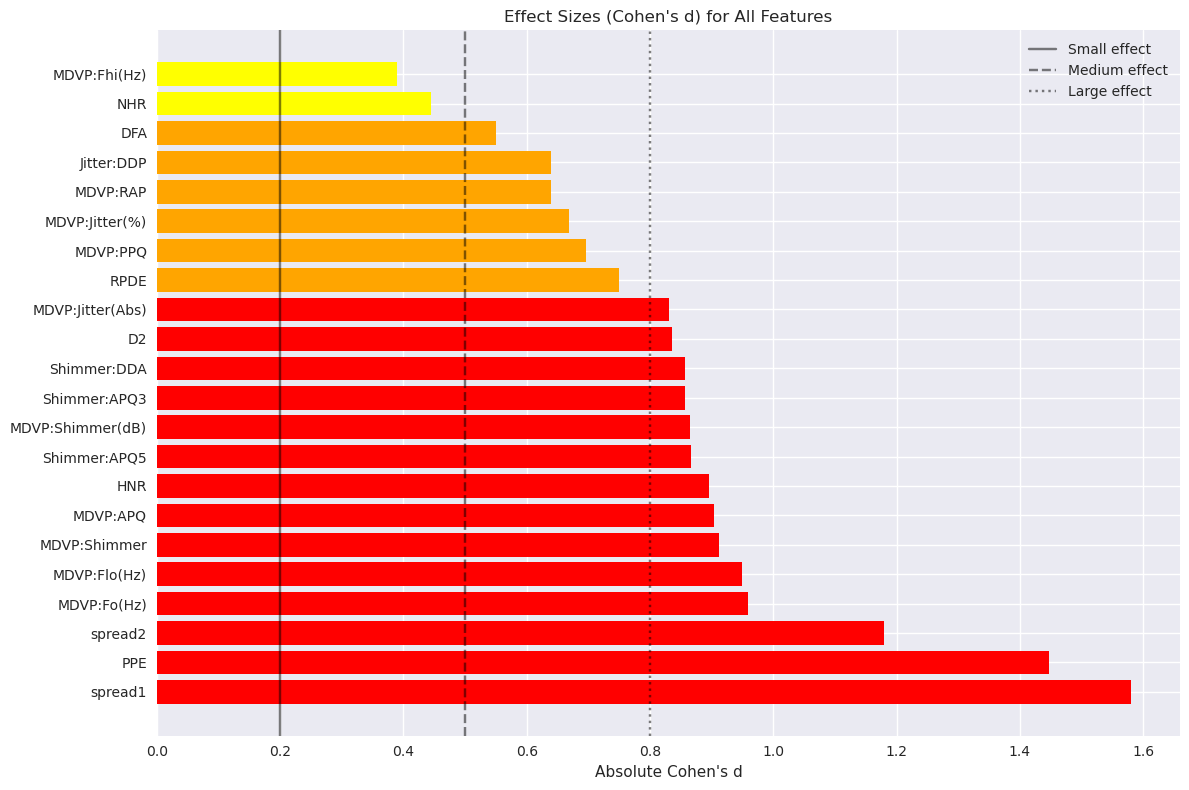

In [10]:
# Calculate Cohen's d for all features
def calculate_cohens_d(group1, group2):
    """Calculate Cohen's d effect size between two groups."""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Cohen's d
    d = (np.mean(group1) - np.mean(group2)) / pooled_std
    return d

# Calculate effect sizes for all features
effect_sizes = []

for feature in numerical_features:
    healthy_data = healthy_group[feature].values
    parkinsons_data = parkinsons_group[feature].values
    
    cohens_d = calculate_cohens_d(parkinsons_data, healthy_data)
    
    # Classify effect size
    if abs(cohens_d) < 0.2:
        effect_magnitude = "Negligible"
    elif abs(cohens_d) < 0.5:
        effect_magnitude = "Small"
    elif abs(cohens_d) < 0.8:
        effect_magnitude = "Medium"
    else:
        effect_magnitude = "Large"
    
    effect_sizes.append({
        'Feature': feature,
        'Cohens_d': cohens_d,
        'Abs_Cohens_d': abs(cohens_d),
        'Effect_Magnitude': effect_magnitude,
        'Parkinsons_Mean': np.mean(parkinsons_data),
        'Healthy_Mean': np.mean(healthy_data),
        'P_value': mw_results_df[mw_results_df['Feature'] == feature]['P_value'].iloc[0]
    })

# Convert to DataFrame and sort by absolute effect size
effect_sizes_df = pd.DataFrame(effect_sizes)
effect_sizes_df = effect_sizes_df.sort_values('Abs_Cohens_d', ascending=False)

print("Cohen's d Effect Sizes for All Features (sorted by magnitude):")
print("=" * 80)
print(effect_sizes_df.round(4))

# Summary statistics
print(f"\nEffect Size Summary:")
print(f"Large effects (|d| ≥ 0.8): {(effect_sizes_df['Abs_Cohens_d'] >= 0.8).sum()}")
print(f"Medium effects (0.5 ≤ |d| < 0.8): {((effect_sizes_df['Abs_Cohens_d'] >= 0.5) & (effect_sizes_df['Abs_Cohens_d'] < 0.8)).sum()}")
print(f"Small effects (0.2 ≤ |d| < 0.5): {((effect_sizes_df['Abs_Cohens_d'] >= 0.2) & (effect_sizes_df['Abs_Cohens_d'] < 0.5)).sum()}")
print(f"Negligible effects (|d| < 0.2): {(effect_sizes_df['Abs_Cohens_d'] < 0.2).sum()}")

# Visualize effect sizes
plt.figure(figsize=(12, 8))
colors = ['red' if d >= 0.8 else 'orange' if d >= 0.5 else 'yellow' if d >= 0.2 else 'lightgray'
          for d in effect_sizes_df['Abs_Cohens_d']]

plt.barh(range(len(effect_sizes_df)), effect_sizes_df['Abs_Cohens_d'], color=colors)
plt.yticks(range(len(effect_sizes_df)), effect_sizes_df['Feature'], fontsize=10)
plt.xlabel("Absolute Cohen's d")
plt.title("Effect Sizes (Cohen's d) for All Features")
plt.axvline(x=0.2, color='black', linestyle='-', alpha=0.5, label='Small effect')
plt.axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Medium effect')
plt.axvline(x=0.8, color='black', linestyle=':', alpha=0.5, label='Large effect')
plt.legend()
plt.tight_layout()
plt.show()


## 2.10 Distribution Visualizations

Creating histograms, box plots, and density plots for each group to visualize feature distributions and differences.


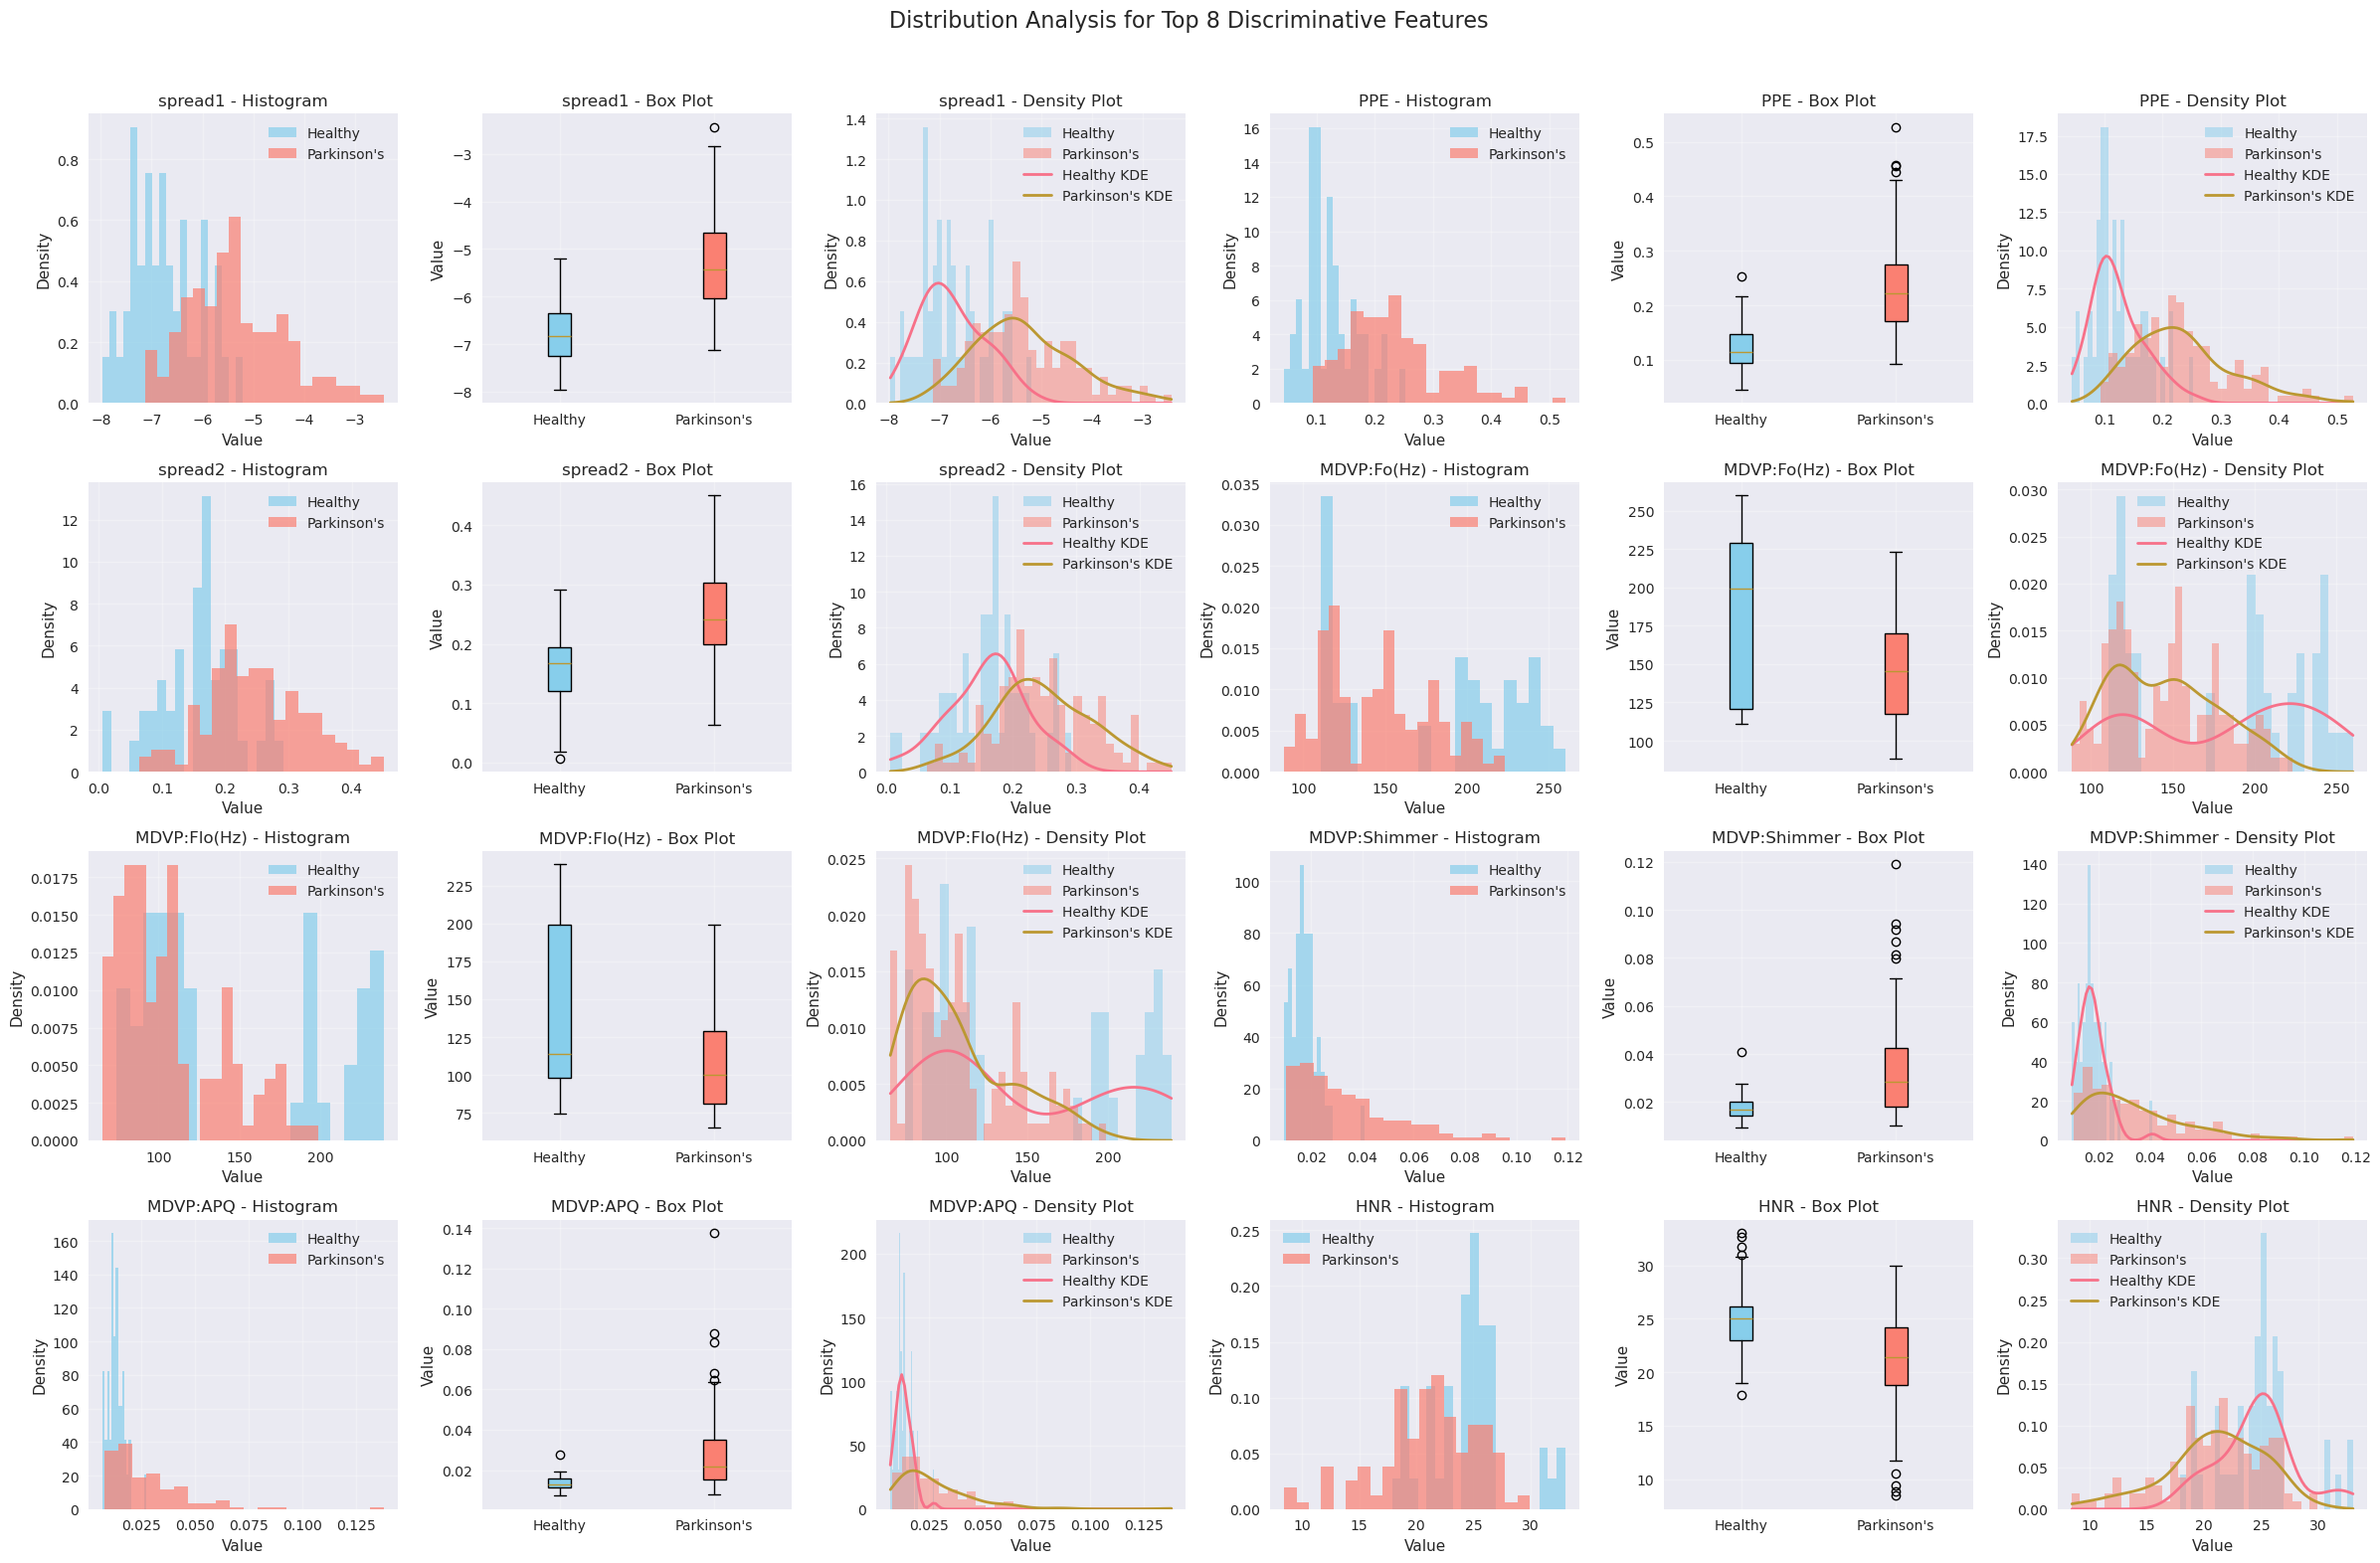

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Visualize distributions for top discriminative features
top_discriminative = effect_sizes_df.head(8)["Feature"].tolist()

# Create comprehensive visualizations for top features
fig, axes = plt.subplots(4, 6, figsize=(24, 16))
fig.suptitle(
    "Distribution Analysis for Top 8 Discriminative Features", fontsize=16, y=0.98
)

for i, feature in enumerate(top_discriminative):
    row = i // 2
    col_base = (i % 2) * 3

    # Get data
    healthy_data = healthy_group[feature].values
    parkinsons_data = parkinsons_group[feature].values

    # Histogram
    ax1 = axes[row, col_base]
    ax1.hist(
        healthy_data, bins=20, alpha=0.7, label="Healthy", color="skyblue", density=True
    )
    ax1.hist(
        parkinsons_data,
        bins=20,
        alpha=0.7,
        label="Parkinson's",
        color="salmon",
        density=True,
    )
    ax1.set_title(f"{feature} - Histogram")
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Density")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Box plot (use tick_labels instead of deprecated labels)
    ax2 = axes[row, col_base + 1]
    data_to_plot = [healthy_data, parkinsons_data]
    box_plot = ax2.boxplot(
        data_to_plot, tick_labels=["Healthy", "Parkinson's"], patch_artist=True
    )
    box_plot["boxes"][0].set_facecolor("skyblue")
    box_plot["boxes"][1].set_facecolor("salmon")
    ax2.set_title(f"{feature} - Box Plot")
    ax2.set_ylabel("Value")
    ax2.grid(True, alpha=0.3)

    # Density plot
    ax3 = axes[row, col_base + 2]
    ax3.hist(
        healthy_data, bins=30, alpha=0.5, label="Healthy", color="skyblue", density=True
    )
    ax3.hist(
        parkinsons_data,
        bins=30,
        alpha=0.5,
        label="Parkinson's",
        color="salmon",
        density=True,
    )

    # Kernel density estimation
    all_data = np.concatenate([healthy_data, parkinsons_data])
    x_range = np.linspace(all_data.min(), all_data.max(), 100)
    kde_healthy = gaussian_kde(healthy_data)
    kde_parkinsons = gaussian_kde(parkinsons_data)
    ax3.plot(x_range, kde_healthy(x_range), linewidth=2, label="Healthy KDE")
    ax3.plot(x_range, kde_parkinsons(x_range), linewidth=2, label="Parkinson's KDE")

    ax3.set_title(f"{feature} - Density Plot")
    ax3.set_xlabel("Value")
    ax3.set_ylabel("Density")
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# Make room for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 2.11 Correlation Analysis

Creating a correlation heatmap to identify relationships between all numerical features.


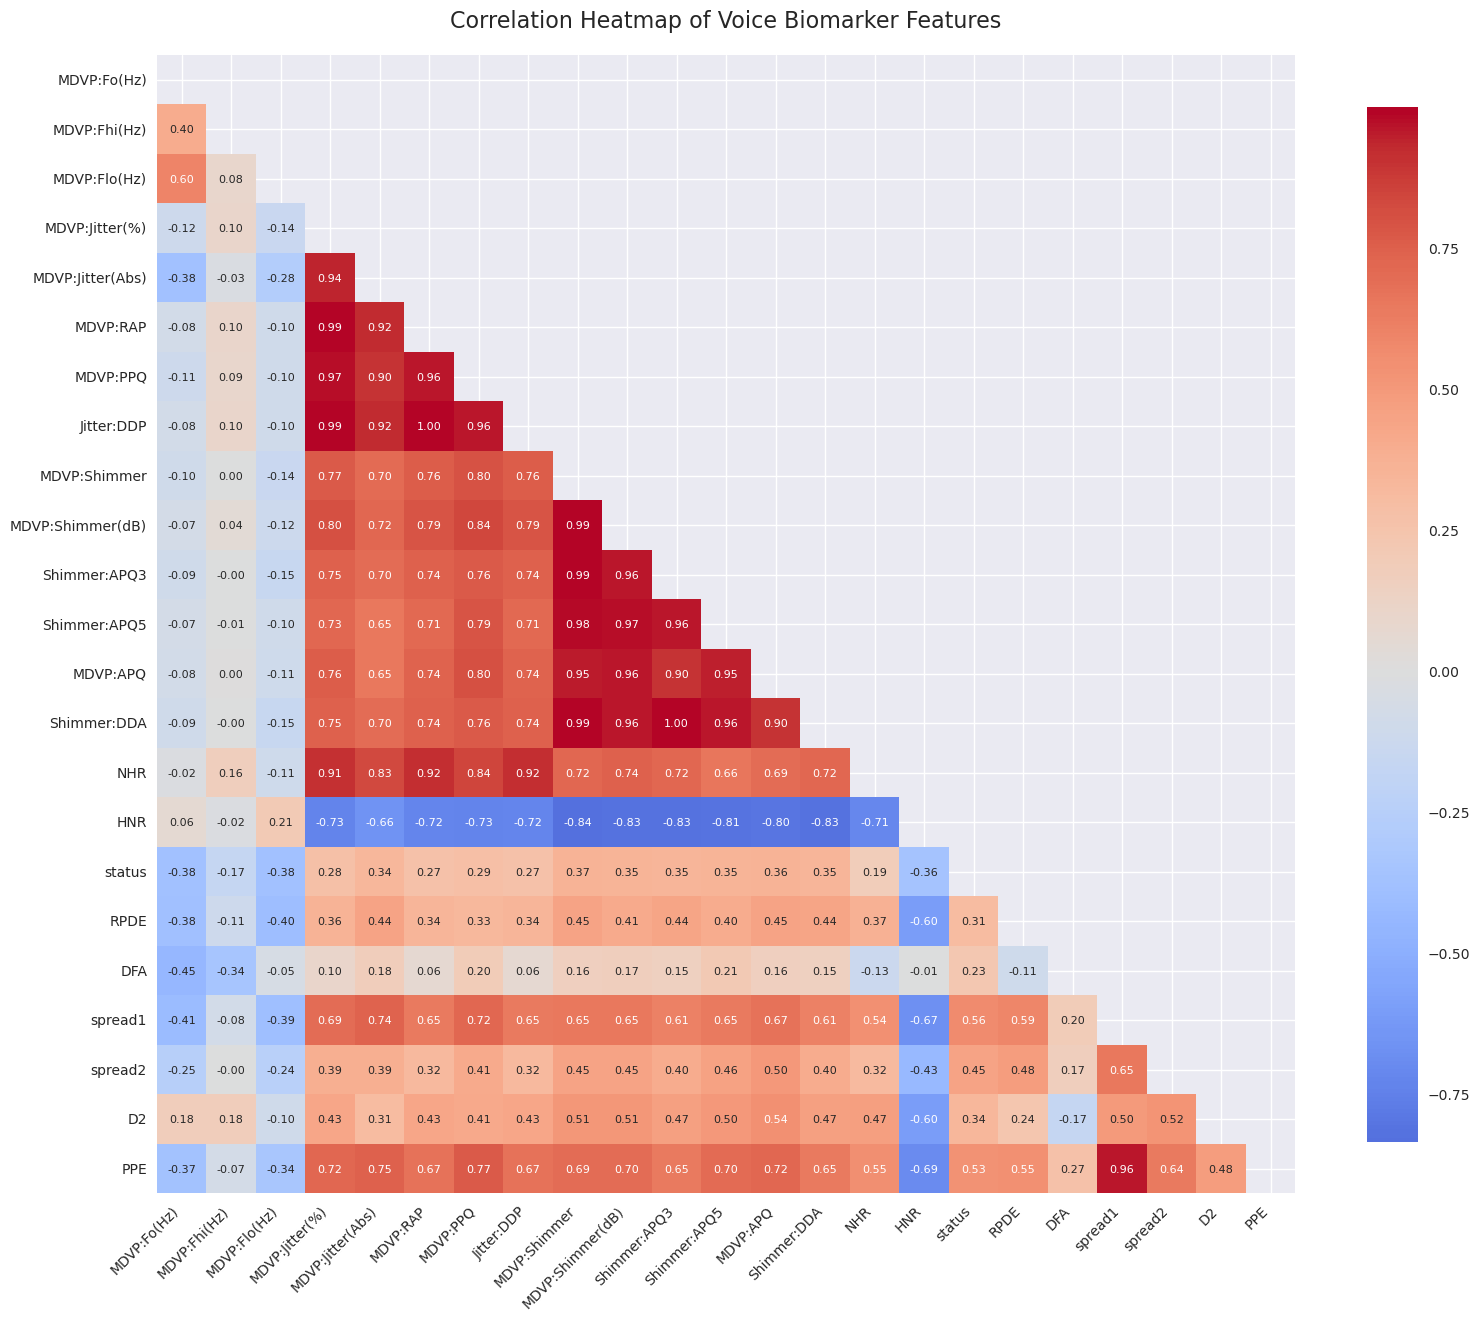

Highly Correlated Feature Pairs (|r| > 0.8):
           Feature_1         Feature_2  Correlation
31      Shimmer:APQ3       Shimmer:DDA     1.000000
11          MDVP:RAP        Jitter:DDP     1.000000
3     MDVP:Jitter(%)        Jitter:DDP     0.990276
1     MDVP:Jitter(%)          MDVP:RAP     0.990276
22      MDVP:Shimmer       Shimmer:DDA     0.987626
19      MDVP:Shimmer      Shimmer:APQ3     0.987625
18      MDVP:Shimmer  MDVP:Shimmer(dB)     0.987258
20      MDVP:Shimmer      Shimmer:APQ5     0.982835
2     MDVP:Jitter(%)          MDVP:PPQ     0.974256
25  MDVP:Shimmer(dB)      Shimmer:APQ5     0.973751
27  MDVP:Shimmer(dB)       Shimmer:DDA     0.963202
24  MDVP:Shimmer(dB)      Shimmer:APQ3     0.963198
39           spread1               PPE     0.962435
26  MDVP:Shimmer(dB)          MDVP:APQ     0.960977
34      Shimmer:APQ5       Shimmer:DDA     0.960072
29      Shimmer:APQ3      Shimmer:APQ5     0.960070
13          MDVP:PPQ        Jitter:DDP     0.957319
10          MDVP:RA

In [12]:
# Calculate correlation matrix for all numerical features
correlation_matrix = df[numerical_features_with_target].corr()

# Create correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

# Create heatmap
heatmap = sns.heatmap(correlation_matrix, 
                      mask=mask,
                      annot=True, 
                      cmap='coolwarm', 
                      center=0,
                      square=True,
                      fmt='.2f',
                      cbar_kws={"shrink": 0.8},
                      annot_kws={'size': 8})

plt.title('Correlation Heatmap of Voice Biomarker Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify highly correlated features
print("Highly Correlated Feature Pairs (|r| > 0.8):")
print("=" * 50)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df)
else:
    print("No feature pairs with correlation > 0.8 found.")

# Feature correlations by category
print("\nCorrelation Analysis by Feature Category:")
print("=" * 50)

for category, features in feature_categories.items():
    if len(features) > 1:
        category_corr = correlation_matrix.loc[features, features]
        avg_corr = category_corr.values[np.triu_indices_from(category_corr.values, k=1)].mean()
        max_corr = np.abs(category_corr.values[np.triu_indices_from(category_corr.values, k=1)]).max()
        print(f"{category}: Avg correlation = {avg_corr:.3f}, Max correlation = {max_corr:.3f}")
    else:
        print(f"{category}: Only one feature, no internal correlation")

## 2.12 Top Discriminative Features Summary

Documenting and summarizing the most discriminative features for Parkinson's disease detection based on statistical analysis.


In [15]:
# Create comprehensive summary of top discriminative features
print("TOP DISCRIMINATIVE FEATURES FOR PARKINSON'S DISEASE DETECTION")
print("=" * 80)

# Combine statistical results
summary_data = []
for _, row in effect_sizes_df.head(10).iterrows():
    feature = row['Feature']
    
    # Get Mann-Whitney U results
    mw_row = mw_results_df[mw_results_df['Feature'] == feature].iloc[0]
    
    # Determine feature category
    feature_category = None
    for category, features in feature_categories.items():
        if feature in features:
            feature_category = category
            break
    
    summary_data.append({
        'Rank': len(summary_data) + 1,
        'Feature': feature,
        'Category': feature_category,
        'Cohens_d': row['Cohens_d'],
        'Effect_Magnitude': row['Effect_Magnitude'],
        'P_value': row['P_value'],
        'FDR_Significant': mw_row['FDR_Significant'],
        'Healthy_Mean': row['Healthy_Mean'],
        'Parkinsons_Mean': row['Parkinsons_Mean'],
        'Difference_Percent': ((row['Parkinsons_Mean'] - row['Healthy_Mean']) / row['Healthy_Mean'] * 100)
    })

summary_df = pd.DataFrame(summary_data)

print("Top 10 Discriminative Features:")
print("-" * 80)
for _, row in summary_df.iterrows():
    print(f"{row['Rank']:2d}. {row['Feature']} ({row['Category']})")
    print(f"    Effect Size: {row['Cohens_d']:.3f} ({row['Effect_Magnitude']})")
    print(f"    P-value: {row['P_value']:.2e}, FDR Significant: {row['FDR_Significant']}")
    print(f"    Healthy mean: {row['Healthy_Mean']:.4f}, Parkinson's mean: {row['Parkinsons_Mean']:.4f}")
    print(f"    Difference: {row['Difference_Percent']:+.1f}%")
    print()

# Feature category analysis
print("FEATURE CATEGORY ANALYSIS:")
print("=" * 50)

category_summary = {}
for category, features in feature_categories.items():
    category_features = summary_df[summary_df['Category'] == category]
    if len(category_features) > 0:
        avg_effect_size = category_features['Cohens_d'].abs().mean()
        significant_count = category_features['FDR_Significant'].sum()
        category_summary[category] = {
            'features_in_top10': len(category_features),
            'avg_effect_size': avg_effect_size,
            'significant_features': significant_count
        }

for category, stats in category_summary.items():
    print(f"{category}:")
    print(f"  Features in top 10: {stats['features_in_top10']}")
    print(f"  Average effect size: {stats['avg_effect_size']:.3f}")
    print(f"  FDR significant features: {stats['significant_features']}")
    print()

# Clinical interpretation
print("CLINICAL INTERPRETATION:")
print("=" * 40)
print("Key findings from the exploratory data analysis:")
print()

# Most discriminative features
top_5_features = summary_df.head(5)['Feature'].tolist()
print(f"1. Top 5 most discriminative features:")
for i, feature in enumerate(top_5_features, 1):
    category = summary_df[summary_df['Feature'] == feature]['Category'].iloc[0]
    effect = summary_df[summary_df['Feature'] == feature]['Effect_Magnitude'].iloc[0]
    print(f"   {i}. {feature} ({category}, {effect} effect)")

print()
print(f"2. Class imbalance: {imbalance_ratio:.1f}:1 (Parkinson's:Healthy)")
print(f"3. Dataset size: {len(df)} voice recordings from 31 individuals")
print(f"4. Features with large effect sizes: {(effect_sizes_df['Abs_Cohens_d'] >= 0.8).sum()}")
print(f"5. Statistically significant features (FDR): {mw_results_df['FDR_Significant'].sum()}")


TOP DISCRIMINATIVE FEATURES FOR PARKINSON'S DISEASE DETECTION
Top 10 Discriminative Features:
--------------------------------------------------------------------------------
 1. spread1 (Frequency Variation)
    Effect Size: 1.581 (Large)
    P-value: 1.59e-16, FDR Significant: True
    Healthy mean: -6.7593, Parkinson's mean: -5.3334
    Difference: -21.1%

 2. PPE (Frequency Variation)
    Effect Size: 1.447 (Large)
    P-value: 1.59e-16, FDR Significant: True
    Healthy mean: 0.1230, Parkinson's mean: 0.2338
    Difference: +90.1%

 3. spread2 (Frequency Variation)
    Effect Size: 1.180 (Large)
    P-value: 7.16e-11, FDR Significant: True
    Healthy mean: 0.1603, Parkinson's mean: 0.2481
    Difference: +54.8%

 4. MDVP:Fo(Hz) (Fundamental Frequency)
    Effect Size: -0.959 (Large)
    P-value: 3.05e-05, FDR Significant: True
    Healthy mean: 181.9378, Parkinson's mean: 145.1808
    Difference: -20.2%

 5. MDVP:Flo(Hz) (Fundamental Frequency)
    Effect Size: -0.949 (Large)
   